
# Project 01: Titanic Dataset Analysis
On April 15, 1912, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This tragedy shocked the world and led to better safety regulations for ships. This project:

1. Perform the exploratory data analysis(EDA) 
          
          passengers age distribution
          passengers survival by age
          passengers survival breakdown
          passengers class distribution
          passengers embarkation by locations
          
2. Build the machine learning model to predict which passengers survived the tragedy.
      
          create user defined function to load train data set
          create user defined function to load test data set 
          create machine model 
          train the machine
          predict whether a passenger survived the tragedy or not
          persist the mode for future re-use

3. Datasets
        
          test.csv
          train.csv


### Data Acquisition of the Titanic dataset


In [0]:
#import required libraries
import pandas as pd
from pandas import Series,DataFrame

In [0]:
#import Titanic train dataset csv file in a DataFrame
train_df = pd.read_csv('train.csv')

In [0]:
#preiview first 5 records
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#import test dataset
test_df = pd.read_csv('test.csv')

In [0]:
# Preview test dataframe
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Perform Exploratory Data Analysis (EDA) for the train dataset

In [0]:
# import required libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

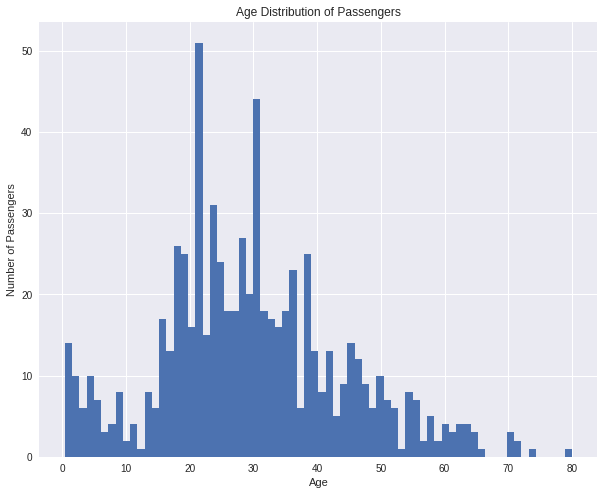

In [0]:
# Explore data for passengers age distribution
plt.figure(figsize=(10,8))
train_df['Age'].hist(bins=70)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

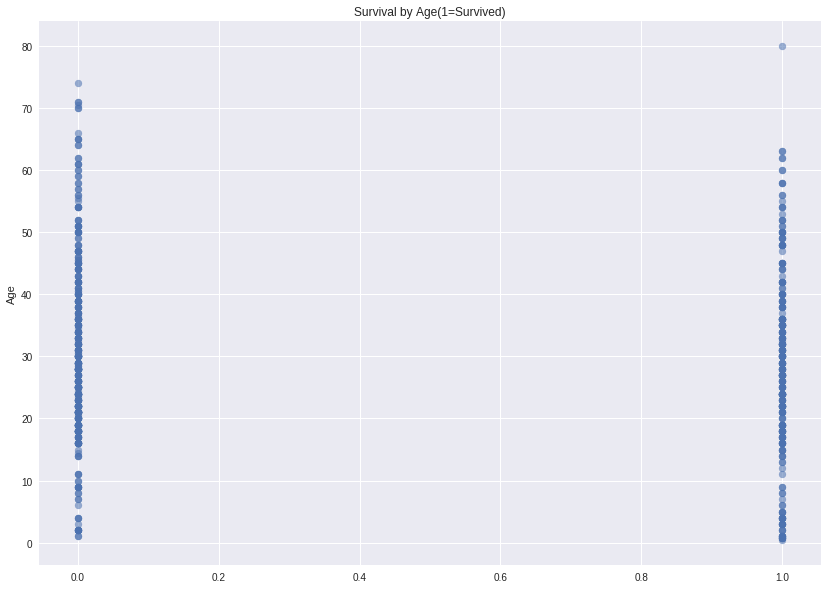

In [0]:
#Explore data for passengers survival by age
plt.figure(figsize=(14,10))
plt.scatter(train_df.Survived,train_df.Age, alpha=.55)
plt.ylabel('Age')
plt.grid(b=True,which='major',axis='y')
plt.title('Survival by Age(1=Survived)')    
plt.show()         

0    549
1    342
Name: Survived, dtype: int64


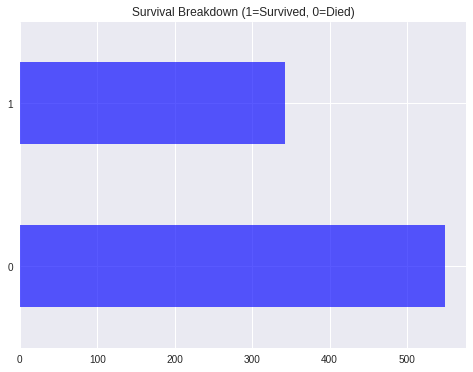

In [0]:
#explore data for passengers survival breakdown
plt.figure(figsize=(8,6))
print(train_df.Survived.value_counts())
train_df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
plt.title('Survival Breakdown (1=Survived, 0=Died)')
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


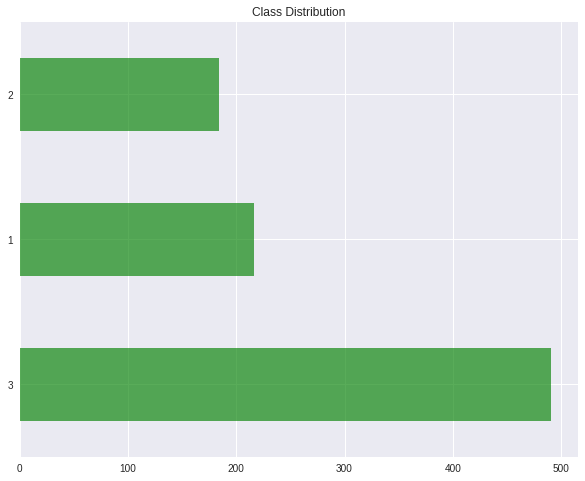

In [0]:
#explore data for passengers class distribution
plt.figure(figsize=(10,8))
print(train_df.Pclass.value_counts())
train_df.Pclass.value_counts().plot(kind='barh', color='g', alpha=.65)
plt.title('Class Distribution')
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


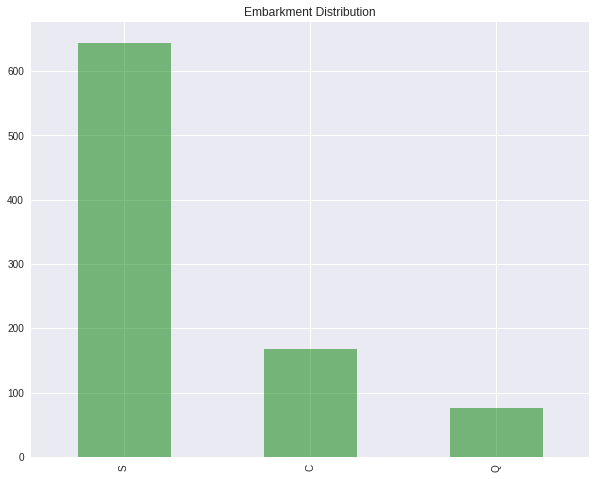

In [0]:
#explore data for passengers embarkment by location
plt.figure(figsize=(10,8))
print(train_df.Embarked.value_counts())
train_df.Embarked.value_counts().plot(kind='bar', color='g', alpha=.5)
plt.title('Embarkment Distribution')
plt.show()

### Perform machine learning to train the machine model

In [0]:
#create a function to load train data file
def load_titanic_train_file():
  titanic_train_df = pd.read_csv('train.csv')
  cols=['Pclass','Sex','Age']
  #change male to 1, female to 0
  titanic_train_df['Sex']=titanic_train_df['Sex'].apply(lambda sex:1 if sex=='Male' else 0)
  #handle missing value of Age, Fare
  titanic_train_df['Age']=titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean())
  titanic_train_df['Fare']=titanic_train_df['Fare'].fillna(titanic_train_df['Fare'].mean())
  survived = titanic_train_df['Survived'].values
  data = titanic_train_df[cols].values
  return survived,data

In [0]:
#create a function to load test data file
def load_titanic_test_file():
  titanic_test_df = pd.read_csv('test.csv')
  cols=['Pclass','Sex','Age']
  #change male to 1, female to 0
  titanic_test_df['Sex']=titanic_test_df['Sex'].apply(lambda sex:1 if sex=='Male' else 0)
  #handle missing value of Age, Fare
  titanic_test_df['Age']=titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean())
  titanic_test_df['Fare']=titanic_test_df['Fare'].fillna(titanic_test_df['Fare'].mean())
  #survived = titanic_test_df['Survived'].values
  data = titanic_test_df[cols].values
  return data

In [105]:
#create dataset for machine learning
survived, data_train = load_titanic_train_file()
#type(data_train)
data_test=load_titanic_test_file()
type(data_test)
data_test=np.asarray(data_test)
type(data_set)

list

### Machine Learning: Model Training

In [0]:
#import the logistic regression model for machine learning
from sklearn.linear_model import LogisticRegression
#create model (estimator)
model = LogisticRegression()

In [115]:
#fit the data into model
model.fit(data_train, survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#predict the test data with the model
predict = model.predict(data_test)

In [118]:
#view the predicted values
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [122]:
#create test dataset for prediction & testing
new_test_prediction_set = [[1,1,22],[3,0,26],[1,0,38]]
print(type(new_test_prediction_set))

<type 'list'>


In [123]:
#predict the test model
model.predict(new_test_prediction_set)

array([1, 0, 1])

### Machine Learning: Model Persistence

In [0]:
# import library for model persistance
import pickle as pkl

In [0]:
#use dumps method to persist the model
persist_model = pkl.dumps(model)

In [126]:
#view the persisted model
persist_model

"ccopy_reg\n_reconstructor\np0\n(csklearn.linear_model.logistic\nLogisticRegression\np1\nc__builtin__\nobject\np2\nNtp3\nRp4\n(dp5\nS'warm_start'\np6\nI00\nsS'C'\np7\nF1.0\nsS'n_jobs'\np8\nNsS'verbose'\np9\nI0\nsS'fit_intercept'\np10\nI01\nsS'solver'\np11\nS'warn'\np12\nsS'classes_'\np13\ncnumpy.core.multiarray\n_reconstruct\np14\n(cnumpy\nndarray\np15\n(I0\ntp16\nS'b'\np17\ntp18\nRp19\n(I1\n(I2\ntp20\ncnumpy\ndtype\np21\n(S'i8'\np22\nI0\nI1\ntp23\nRp24\n(I3\nS'<'\np25\nNNNI-1\nI-1\nI0\ntp26\nbI00\nS'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00'\np27\ntp28\nbsS'n_iter_'\np29\ng14\n(g15\n(I0\ntp30\ng17\ntp31\nRp32\n(I1\n(I1\ntp33\ng21\n(S'i4'\np34\nI0\nI1\ntp35\nRp36\n(I3\nS'<'\np37\nNNNI-1\nI-1\nI0\ntp38\nbI00\nS'\\n\\x00\\x00\\x00'\np39\ntp40\nbsS'intercept_scaling'\np41\nI1\nsS'penalty'\np42\nS'l2'\np43\nsS'multi_class'\np44\ng12\nsS'random_state'\np45\nNsS'_sklearn_version'\np46\nS'0.20.2'\np47\nsS'dual'\np48\nI00\nsS'tol'\np49\nF0.0001\nsS'coef_'

In [127]:
# use joblib to persist the model to a file
from sklearn.externals import joblib
joblib.dump(model,'regModel.pkl')

['regModel.pkl']

In [0]:
#create new model from the saved model
new_model = joblib.load('regModel.pkl')

In [129]:
#view the new model
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
new_model.predict(new_test_prediction_set)

array([1, 0, 1])